In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
df1 = pd.read_csv("/Users/yash/Pune_house_data.csv")
df1.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [ ]:
df1.shape

(13320, 9)

In [ ]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [ ]:
df2 = df1.drop(["area_type", "society", "balcony", "availability"],axis="columns")
df2.head()

,size,total_sqft,bath,price,site_location
0,2 BHK,1056,2.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,62.00,Anandnagar
3,3 BHK,1521,3.0,95.00,Aundh
4,2 BHK,1200,2.0,51.00,Aundh Road


In [ ]:
df2.isnull().sum()

size             16
total_sqft        0
bath             73
price             0
site_location     1
dtype: int64

In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

size             0
total_sqft       0
bath             0
price            0
site_location    0
dtype: int64

In [ ]:
df3.shape

(13246, 5)

In [ ]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))
pd.set_option("mode.chained_assignment",None)

In [ ]:
df3.head()

,size,total_sqft,bath,price,site_location,bhk
0,2 BHK,1056,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,95.00,Aundh,3
4,2 BHK,1200,2.0,51.00,Aundh Road,2


In [ ]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df3[df3.bhk>20]

,size,total_sqft,bath,price,site_location,bhk
1718,27 BHK,8000,27.0,230.0,Uruli Devachi,27
4684,43 Bedroom,2400,40.0,660.0,Salunke Vihar,43


In [ ]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df3[~df3["total_sqft"].apply(is_float)]

,size,total_sqft,bath,price,site_location,bhk
30,4 BHK,2100 - 2850,4.0,186.000,Gultekdi,4
122,4 BHK,3067 - 8156,4.0,477.000,Ganeshkhind,4
137,2 BHK,1042 - 1105,2.0,54.005,Khadaki,2
165,2 BHK,1145 - 1340,2.0,43.490,Prabhat Road,2
188,2 BHK,1015 - 1540,2.0,56.800,Wakadewadi,2
...,...,...,...,...,...,...
12975,2 BHK,850 - 1060,2.0,38.190,Camp,2
12990,3 BHK,1804 - 2273,3.0,122.000,Gokhale Nagar,3
13059,2 BHK,1200 - 1470,2.0,72.760,Anandnagar,2
13265,2 BHK,1133 - 1384,2.0,59.135,Dapodi,2


In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
convert_sqft_to_num("3123")

3123.0

In [ ]:
convert_sqft_to_num("3067-8156")

5611.5

In [ ]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_num)
df4.head()

,size,total_sqft,bath,price,site_location,bhk
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3
3,3 BHK,1521.0,3.0,95.00,Aundh,3
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2


In [ ]:
df4.loc[122]

size                   4 BHK
total_sqft            5611.5
bath                     4.0
price                  477.0
site_location    Ganeshkhind
bhk                        4
Name: 122, dtype: object

In [ ]:
df5 = df4.copy()
df5["price_per_sqft"] = df5["price"]*100000/df5["total_sqft"]
df5.head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,Aundh,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2,4250.000000


In [ ]:
len(df5.site_location.unique())

97

In [ ]:
df5[df5.total_sqft/df5.bhk<300].head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
9,6 Bedroom,1020.0,6.0,370.0,Bhavani Peth,6,36274.509804
45,8 Bedroom,600.0,9.0,200.0,Kondhwa Budruk,8,33333.333333
58,6 Bedroom,1407.0,4.0,150.0,Mundhawa,6,10660.980810
68,8 Bedroom,1350.0,7.0,85.0,Pirangut,8,6296.296296
70,3 Bedroom,500.0,3.0,100.0,Pune Railway Station,3,20000.000000


In [ ]:
df5.shape

(13246, 7)

In [ ]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [ ]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.628922
std        4168.075333
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("site_location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10883, 7)

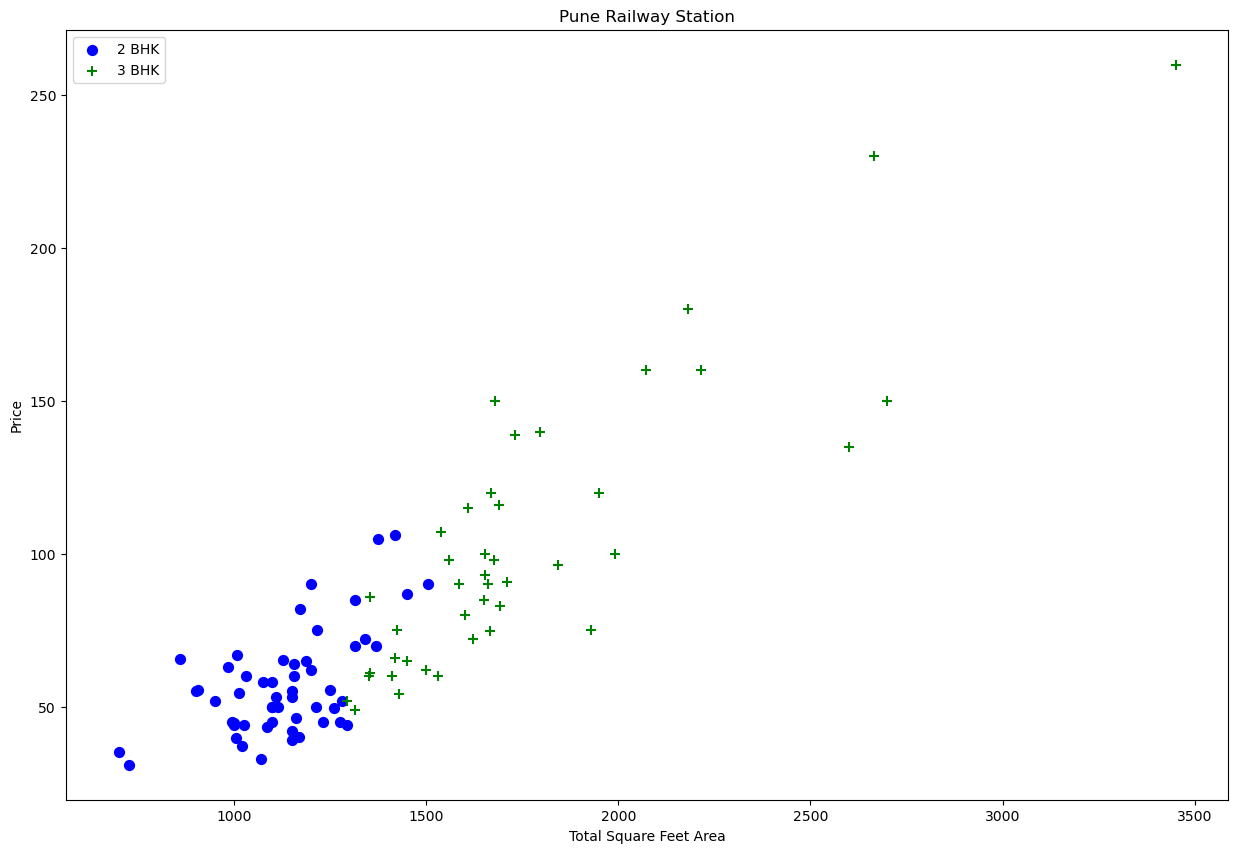

In [ ]:
def plot_scatter_chart(df, site_location):
    bhk2 = df[(df.site_location == site_location)&(df.bhk == 2)]
    bhk3 = df[(df.site_location == site_location)&(df.bhk == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = "blue", label = "2 BHK", s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = "+", color = "green", label = "3 BHK", s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(site_location)
    plt.legend()

plot_scatter_chart(df7, "Pune Railway Station")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for site_location, site_location_df in df.groupby("site_location"):
        bhk_stats = {}
        for bhk, bhk_df in site_location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in site_location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices, axis="index")

df8 = remove_bhk_outliers(df7)
df8.shape

(7543, 7)

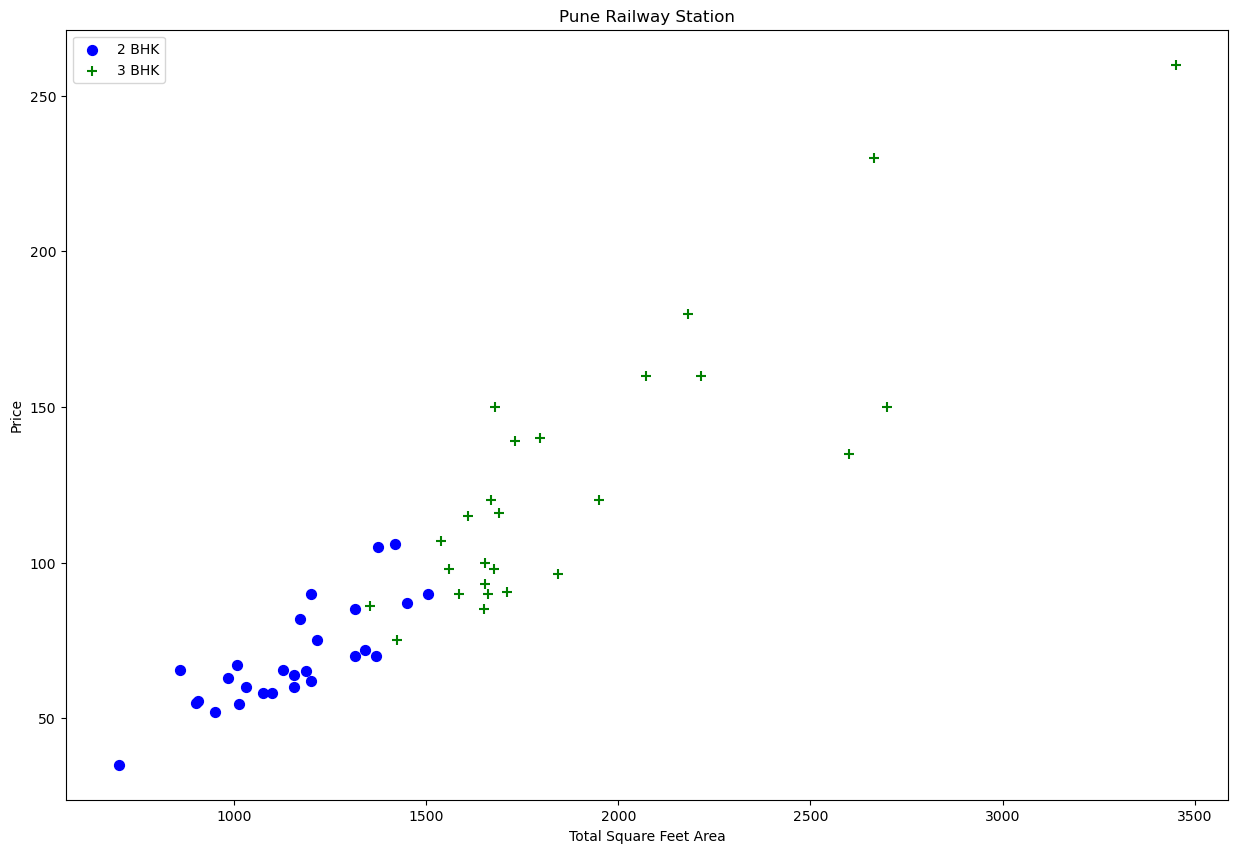

In [ ]:
plot_scatter_chart(df8, "Pune Railway Station")

Text(0, 0.5, 'Count')

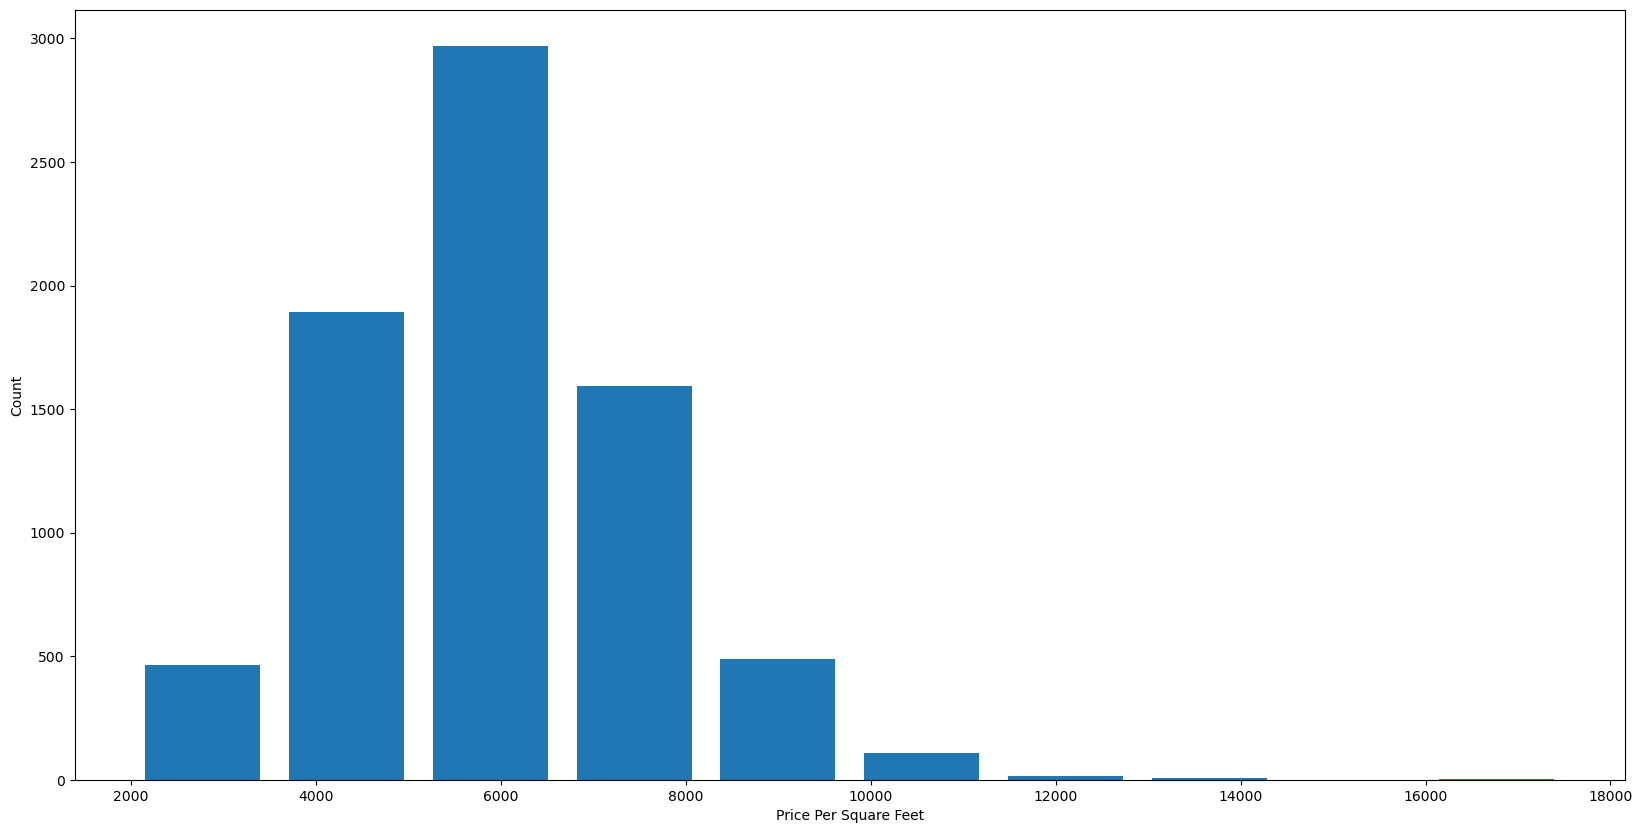

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
df8.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

In [ ]:
df8[df8.bath>10]

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
1211,11 BHK,6000.0,12.0,150.0,Bibvewadi,11,2500.000000
2637,10 BHK,12000.0,12.0,525.0,Fatima Nagar,10,4375.000000
5265,13 BHK,5425.0,13.0,275.0,Kondhwa Khurd,13,5069.124424
6350,16 BHK,10000.0,16.0,550.0,Model colony,16,5500.000000
10389,10 BHK,4000.0,12.0,160.0,Wagholi,10,4000.000000


Text(0, 0.5, 'Count')

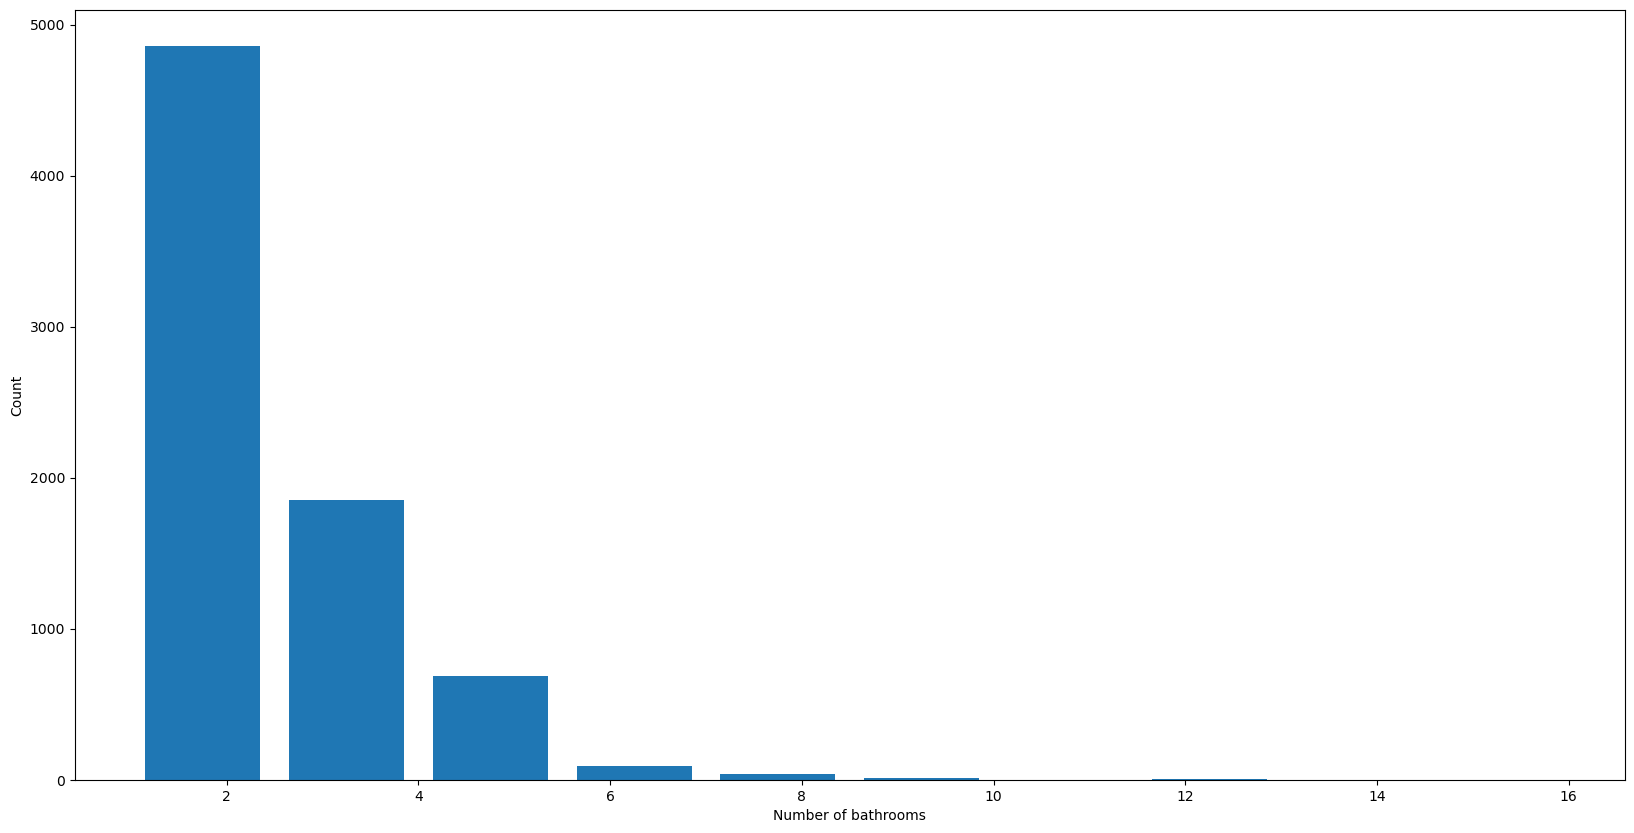

In [ ]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df8[df8.bath>df8.bhk+2]

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
772,3 BHK,1806.0,6.0,116.0,Baner,3,6423.034330
3067,6 BHK,11338.0,9.0,1000.0,Ghorpade Peth,6,8819.897689
4231,4 Bedroom,7000.0,8.0,450.0,Karve Nagar,4,6428.571429


In [ ]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7479, 7)

In [ ]:
df10 = df9.drop(["size", "price_per_sqft"], axis="columns")
df10.head()

,total_sqft,bath,price,site_location,bhk
0,1056.0,2.0,39.07,Alandi Road,2
1,2894.0,4.0,245.00,Alandi Road,4
2,1084.0,2.0,50.00,Alandi Road,2
3,1230.0,2.0,80.00,Alandi Road,2
4,1750.0,3.0,130.00,Alandi Road,3


In [ ]:
dummies = pd.get_dummies(df10.site_location, dtype=int)
dummies.head(3)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = pd.concat([df10,dummies.drop("Yerawada", axis="columns")], axis = "columns")
df11.head()

,total_sqft,bath,price,site_location,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Tilak Road,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje
0,1056.0,2.0,39.07,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,Alandi Road,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,Alandi Road,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12 = df11.drop("site_location", axis="columns")
df12.head()

,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Tilak Road,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje
0,1056.0,2.0,39.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12.shape

(7479, 99)

In [ ]:
X = df12.drop("price", axis="columns")
X.head()

,total_sqft,bath,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Tilak Road,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje
0,1056.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df12.price
y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train.values)
lr_clf.score(X_test,y_test.values)

0.8234642712561866

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.87729294, 0.87158074, 0.82825079, 0.89763339, 0.81068616])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        "linear_regression" : {
            "model" : LinearRegression(),
            "params" : {
                "copy_X" : [True, False],
                "fit_intercept" : [True, False],
                "n_jobs" : [1,2,3],
                "positive" : [True, False]
            }
        },
        "lasso" : {
            "model" : Lasso(),
            "params" : {
                "alpha" : [1,2],
                "selection" : ["random", "cyclic"]
            }
        },
        "decision_tree" : {
            "model" : DecisionTreeRegressor(),
            "params" : {
                "criterion" : ["squared_error", "friedman_mse"],
                "splitter" : ["best", "random"]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score = False)

        gs.fit(X, y)
        scores.append({
            "model" : algo_name,
            "best_score" : gs.best_score_,
            "best_params" : gs.best_params_
        })
    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.860683,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.857851,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.766050,"{'criterion': 'squared_error', 'splitter': 'be..."


In [ ]:
def predict_price(site_location, sqft, bath, bhk):
    loc_index = np.where(X.columns==site_location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
predict_price("Aundh", 1000, 2, 2)

65.92437013734883

In [ ]:
predict_price("Aundh", 1000, 3, 3)

68.44874179482046

In [ ]:
predict_price("Baner", 2000, 4, 4)

127.16419239014066